# Lesson 3 Assignment - Monty Hall Simulation
## Author - Kenji Oman

### Instructions
Simulate the conditional probabilities of the distributions for winning a car vs. a goat for the Monty Hall Problem that includes the following:
1. the cases of switching or not switching
2. histograms and summary statistics (at least mean and variance) of the results for winning the car or a goat for both strategies, switching or not switching
3. comparison of the cases to determine the best strategy
4. recommended strategy



#### Note: 
Please clearly outline the results and your recommendation with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
# Import libraries
import numpy as np
from collections import namedtuple
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set seed just to make this notebook replicatable
np.random.seed(0)

In [2]:
# Create function to run through one game
def play_game(switch=False):
    """
    switch = If we change our decision after one is revealed.
    
    Note:
    Doors are labeled as 0, 1, or 2.
    """
    
    # Set up doors available to pick
    doors = set((0, 1, 2))
    
    # Pick which door to place the car behind
    car_door = set(np.random.randint(3, size=1))
    
    # Pick which door to choose as our guess
    choice = set(np.random.randint(3, size=1))
    
    # Now, grab which door is revealed
    reveal = doors - (car_door | choice)
    
#     print("Befor switch reveal", reveal, "cardoor", car_door, "choice", choice)
    
    # If car_door had equaled choice, so reveal contains
    # the remaining two doors, just pick one randomly
    if car_door == choice:
        reveal = set([list(reveal)[np.random.randint(2)]])
    
#     print("after switch reveal", reveal, "cardoor", car_door, "choice", choice)
    
    # If we want to switch, set our new choice
    if switch:
        new_choice = doors - (choice | reveal)
    else:
        new_choice = choice.copy()
        
    # Now, determine if we one
    win = (new_choice == car_door)
#     print("before end choice", choice, "newchoice", new_choice, "cardoor", car_door, "win", win, "reveal", reveal)
    # Return the results
    results = namedtuple('game', 'switch choice new_choice car_door win')
    return results(switch, choice.pop(), new_choice.pop(), car_door.pop(), win)

In [3]:
# Now, make function to simulate multiple trials
def simulation(n=10000):
    """
    n = number of games to simulate. Will do n with switching, and
        n without.
    """
    
    # Initialize the results
    result = []
    
    # For each of the behaviors (switch or not switch)
    for s in [True, False]:
        for game in range(n):
            result.append(play_game(switch=s))
            
    # Now that we've played all our games, let's make it a pd.Dataframe
    # and return
    return pd.DataFrame(result)

In [4]:
# Play the game 10,000 times
outcomes = simulation(10000)
outcomes.head()

,switch,choice,new_choice,car_door,win
0,True,1,0,0,True
1,True,1,0,0,True
2,True,2,1,1,True
3,True,2,0,0,True
4,True,0,2,0,False


In [5]:
# Check some summary statistics when group by 
outcomes.astype(int).groupby('switch').win.describe()

,count,mean,std,min,25%,50%,75%,max
switch,,,,,,,,
0,10000.0,0.3404,0.473867,0.0,0.0,0.0,1.0,1.0
1,10000.0,0.6689,0.470632,0.0,0.0,1.0,1.0,1.0


We see that, if we switch (= 1, in this case, since we cast everything to int to make the describe give mean/ std), we are more likely to win -- about 2/3 of the time, as opposed to about 1/3 of the time if we don't switch.  Let's look at this in graphical form.

In [6]:
# First, prepare a summary of wins and losses per strategy
summary = outcomes.groupby('switch').win.value_counts(normalize=True, sort=False)\
    .rename('fraction').reset_index()
summary

,switch,win,fraction
0,False,False,0.6596
1,False,True,0.3404
2,True,False,0.3311
3,True,True,0.6689


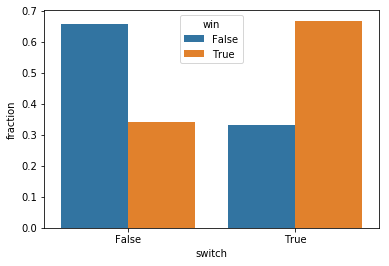

In [7]:
# Now, make a plot of the summary
sns.barplot(x='switch', y='fraction', hue='win', data=summary)
plt.show()

From the above, we clearly see that **it is better to switch if you want to win** this game.  In terms of probabilities, one is about 2/3 likely to lose if one does not switch, while one is about 2/3 likely to win if one does switch.